In [1]:
from IPython.display import clear_output

!pip install -q tensorflow==2.4.1

clear_output()

In [2]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [3]:
!kaggle datasets download -d tentotheminus9/gravity-spy-gravitational-waves

Dataset URL: https://www.kaggle.com/datasets/tentotheminus9/gravity-spy-gravitational-waves
License(s): Attribution 4.0 International (CC BY 4.0)
100% 3.88G/3.89G [00:56<00:00, 121MB/s]
100% 3.89G/3.89G [00:56<00:00, 73.3MB/s]


In [4]:
!unzip gravity-spy-gravitational-waves.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jbSGPY9SuI_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jbxYeVDEAK_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_2.0.png  
  inflating: train/train/Whistle/L1_jsK4vgBbeO_spectrogram_4.0.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spectrogram_0.5.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spectrogram_1.0.png  
  inflating: train/train/Whistle/L1_jxwh9gAJPg_spect

In [5]:
train_dir = 'train/train/'
validation_dir = 'validation/validation/'
test_dir = 'test/test/'

In [6]:
import tensorflow as tf

IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

validation_data = tf.keras.preprocessing.image_dataset_from_directory(validation_dir,
                                                                     label_mode='categorical',
                                                                     image_size=IMG_SIZE,
                                                                     batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32,
                                                               shuffle=False)

Found 22348 files belonging to 22 classes.
Found 4800 files belonging to 22 classes.
Found 4720 files belonging to 22 classes.


In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 22), dtype=tf.float32, name=None))>

In [8]:
# Get the class names
class_names = train_data.class_names
class_names[:]

['1080Lines',
 '1400Ripples',
 'Air_Compressor',
 'Blip',
 'Chirp',
 'Extremely_Loud',
 'Helix',
 'Koi_Fish',
 'Light_Modulation',
 'Low_Frequency_Burst',
 'Low_Frequency_Lines',
 'No_Glitch',
 'None_of_the_Above',
 'Paired_Doves',
 'Power_Line',
 'Repeating_Blips',
 'Scattered_Light',
 'Scratchy',
 'Tomte',
 'Violin_Mode',
 'Wandering_Line',
 'Whistle']

In [9]:
# Check the number of class names
len(class_names)

22

In [10]:
# Let's visualize some images from training data set
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir=train_dir,
                      target_class=None,
                      num_imgs=4):
    target_dir = target_dir + target_class
    random_image = random.sample(os.listdir(target_dir), num_imgs)
    idx = int(np.sqrt(num_imgs))
    fig, axs = plt.subplots(idx, idx, figsize=(8, 8))
    for i in range(idx):
        for j in range(idx):
            random_image_dir = target_dir + "/" + random_image[i]
            img = mpimg.imread(random_image_dir)
            axs[i, j].imshow(img)
            axs[i, j].axis(False)
            axs[i, j].set_title(target_class)

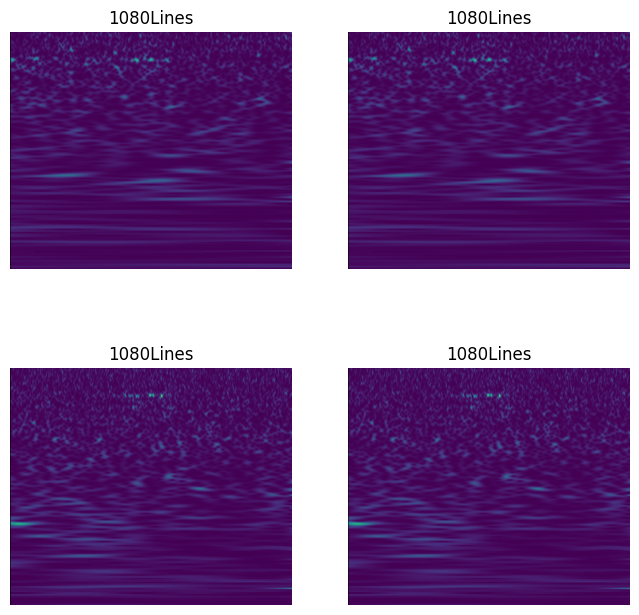

In [11]:
view_random_image(train_dir,
                 class_names[0])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling

# Rescaling layer
image_rescaling = Sequential([
    Rescaling(1/255.)
], name='rescaling_layer')


In [13]:
from tensorflow.keras import layers

# Base model ResNet50V2
base_model = tf.keras.applications.ResNet50V2(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=(224, 224, 3), name='input_layer')
x = image_rescaling(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name='GAP2D')(x)
outputs = layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)

model = tf.keras.Model(inputs, outputs)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
# Model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_layer (Sequential)         │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50v2 (Functional)              │ (None, 7, 7, 2048)          │      23,564,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ GAP2D (GlobalAveragePooling2D)       │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 22)                  │          45,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,609,878 (90.06 MB)

 Trainable params: 45,078 (176.09 KB)

 Non-trainable params: 23,564,800 (89.89 MB)

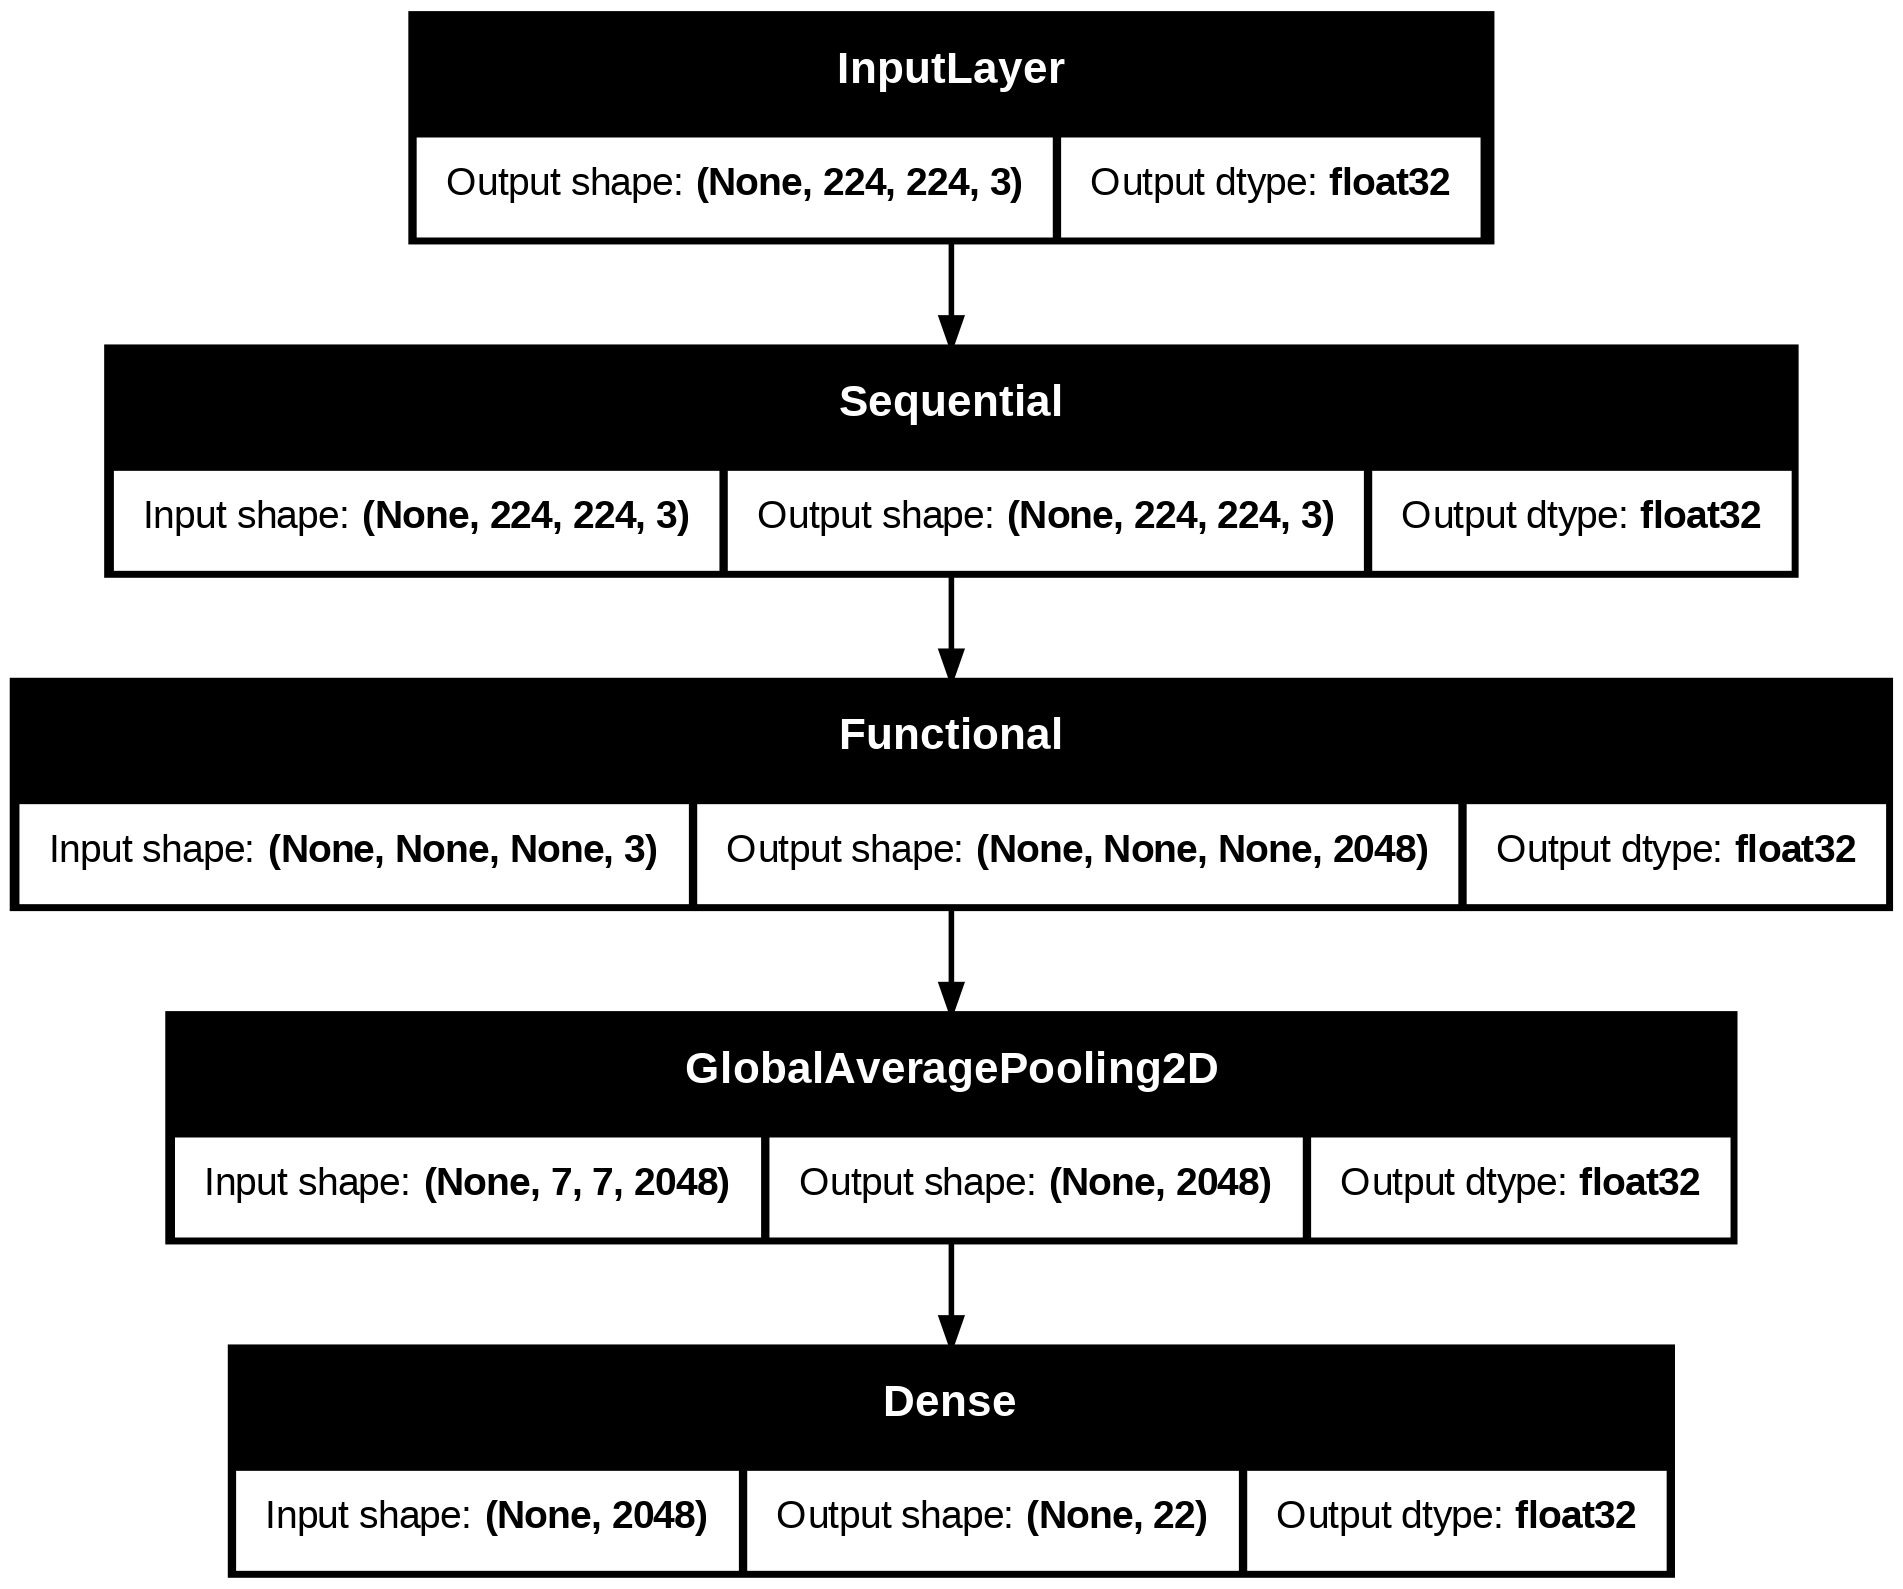

In [15]:

# Plot the model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_dtype=True)

In [16]:
# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

history_feature_extract = model.fit(train_data,
                                    epochs=1,
                                   steps_per_epoch=len(train_data),
                                   validation_data=validation_data,
                                   validation_steps=int(0.15 * len(validation_data))
                             )

699/699 ━━━━━━━━━━━━━━━━━━━━ 194s 258ms/step - accuracy: 0.6914 - loss: 1.1317 - val_accuracy: 0.8707 - val_loss: 0.4890


In [17]:
# Assuming 'history_feature_extract' is your History object
history_dict = history_feature_extract.history

# Print the entire history
print(history_dict)

# Optionally, print specific metrics like loss and accuracy
print("Loss:", history_dict['loss'])
if 'accuracy' in history_dict:
    print("Accuracy:", history_dict['accuracy'])


{'accuracy': [0.8004742860794067], 'loss': [0.7591232657432556], 'val_accuracy': [0.8707386255264282], 'val_loss': [0.48902103304862976]}
Loss: [0.7591232657432556]
Accuracy: [0.8004742860794067]


In [18]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
# Save the model
model.save("/content/drive/glitch_feature_extract.h5")

OSError: [Errno 95] Unable to synchronously create file (unable to open file: name = '/content/drive/glitch_feature_extract.h5', errno = 95, error message = 'Operation not supported', flags = 13, o_flags = 242)

In [21]:
# ModelCheckpoint callback: saves the weight of the best training epoch
checkpoint_path = "/content/drive/My Drive/cp.weights.h5"
modelcheckpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor="val_accuracy",
    verbose=1
)

In [22]:
# Create a TensorBoard callback: visualize different experiments on TensorBoard
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback
# Create EarlyStopping callback: stops model training once the monitor metric stops improving for given patience (epochs)
earlystopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", # watch the val loss metric
                                                          patience=3)
reducelr_callback = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                                        monitor='val_accuracy',
                                                        min_lr=1e-7,
                                                        patience=0,
                                                        verbose=1)

In [23]:
# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

history_feature_extract = model.fit(train_data,
                                    epochs=100,
                                   steps_per_epoch=len(train_data),
                                   validation_data=validation_data,
                                   validation_steps=int(0.15 * len(validation_data)),
                                   callbacks=[create_tensorboard_callback("/content/drive/My Drive",
                                                                         "resnet50v2_feature_extract"),
                                              modelcheckpoint_callback,
                                             earlystopping_callback,
                                             reducelr_callback])

Saving TensorBoard log files to: /content/drive/My Drive/resnet50v2_feature_extract/20241123-173602
Epoch 1/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.8833 - loss: 0.4345
Epoch 1: val_accuracy improved from -inf to 0.90057, saving model to /content/drive/My Drive/cp.weights.h5
699/699 ━━━━━━━━━━━━━━━━━━━━ 184s 249ms/step - accuracy: 0.8833 - loss: 0.4344 - val_accuracy: 0.9006 - val_loss: 0.3713 - learning_rate: 0.0010
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_accuracy did not improve from 0.90057

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
699/699 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8935 - val_loss: 0.3495 - learning_rate: 0.0010
Epoch 3/100
698/699 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.9134 - loss: 0.3164
Epoch 3: val_accuracy did not improve from 0.90057

Epoch 3: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
699/699 ━━━━━━━━━━━━━━━━━━━━ 164s 234ms/step - accuracy: 0.9134 - loss: 0.3163 - val_accuracy: 0.8679 - val_loss: 0.4715 - learning_rate: 2.0000e-04
Epoch 4/100

Epoch 4: val_accuracy improved from 0.90057 to 0.90199, saving model to /content/drive/My Drive/cp.weights.h5
699/699 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9020 - val_loss: 0.3320 - learning_rate: 4.0000e-05
Epoch 5/100
699/699 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9205 - l

In [24]:
# Save the model
model.save("/content/drive/My Drive/glitch_feature_extract_improved.h5")

In [25]:
history_feature_extract

In [26]:
import matplotlib.pyplot as plt

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, axs = plt.subplots(1, 2, sharex=True, squeeze=True, figsize=(12, 6))
    axs[0].plot(epochs, loss, label='loss')
    axs[0].plot(epochs, val_loss, label='val_loss')
    axs[0].set_title('loss')
    axs[0].set_xlabel('epochs')
    axs[0].legend()

    axs[1].plot(epochs, accuracy, label='accuracy')
    axs[1].plot(epochs, val_accuracy, label='val_accuracy')
    axs[1].set_title('accuracy')
    axs[1].set_xlabel('epochs')

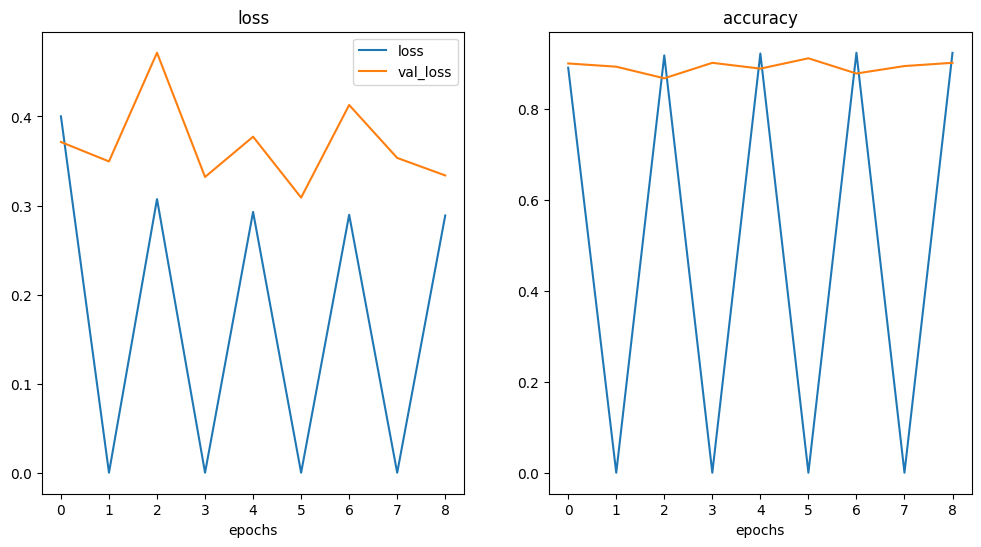

In [27]:

# Plot the loss curves

plot_history(history_feature_extract)

In [28]:
model.evaluate(test_data)


148/148 ━━━━━━━━━━━━━━━━━━━━ 38s 258ms/step - accuracy: 0.9265 - loss: 0.3293


[0.3507359027862549, 0.9025423526763916]

In [29]:
pred_prob = model.predict(test_data, verbose=1)
pred_prob[:5]

148/148 ━━━━━━━━━━━━━━━━━━━━ 36s 213ms/step


array([[1.83723718e-01, 1.70464988e-03, 1.15328645e-02, 1.94573193e-03,
        2.41471662e-06, 1.01423648e-03, 2.13905354e-03, 2.19571825e-06,
        8.09313077e-03, 2.45854706e-02, 5.59694357e-02, 7.29411189e-03,
        1.82114840e-02, 2.27648718e-03, 4.25427735e-01, 1.20439823e-03,
        1.64315432e-01, 7.25939637e-03, 2.20808342e-05, 7.09847361e-02,
        6.58689486e-03, 5.70439827e-03],
       [6.75321579e-01, 2.35678777e-02, 1.67419352e-02, 2.83025234e-04,
        2.54441204e-07, 3.27487905e-05, 3.92061053e-03, 4.72995026e-07,
        8.22058180e-04, 1.70024522e-02, 2.12115161e-02, 1.30561832e-02,
        3.42257530e-03, 3.29636503e-04, 1.09342560e-01, 2.22460614e-04,
        9.11008287e-03, 1.81297748e-03, 9.26329722e-06, 9.55104604e-02,
        5.68575226e-03, 2.59368820e-03],
       [5.28865278e-01, 2.65674479e-02, 9.70122311e-03, 1.63709323e-04,
        1.98015073e-07, 9.36610286e-06, 6.90236862e-04, 3.60977509e-07,
        4.93761909e-04, 2.12557539e-02, 8.87297746e-03

In [30]:
pred_prob.shape

(4720, 22)

In [31]:
pred_class = pred_prob.argmax(axis=1)
pred_class[-10:], pred_class.shape

(array([21, 21, 21, 21, 21, 21, 21, 21, 21, 21]), (4720,))

In [32]:
true_class = []
for images, labels in test_data.unbatch():
    true_class.append(labels.numpy().argmax())
true_class[-10:], len(true_class)

([21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 4720)

In [33]:
# sklearn accuracy (should be equal to tensorflow evaluation)
from sklearn.metrics import accuracy_score
sklearn_score = accuracy_score(true_class, pred_class)
sklearn_score

0.902542372881356

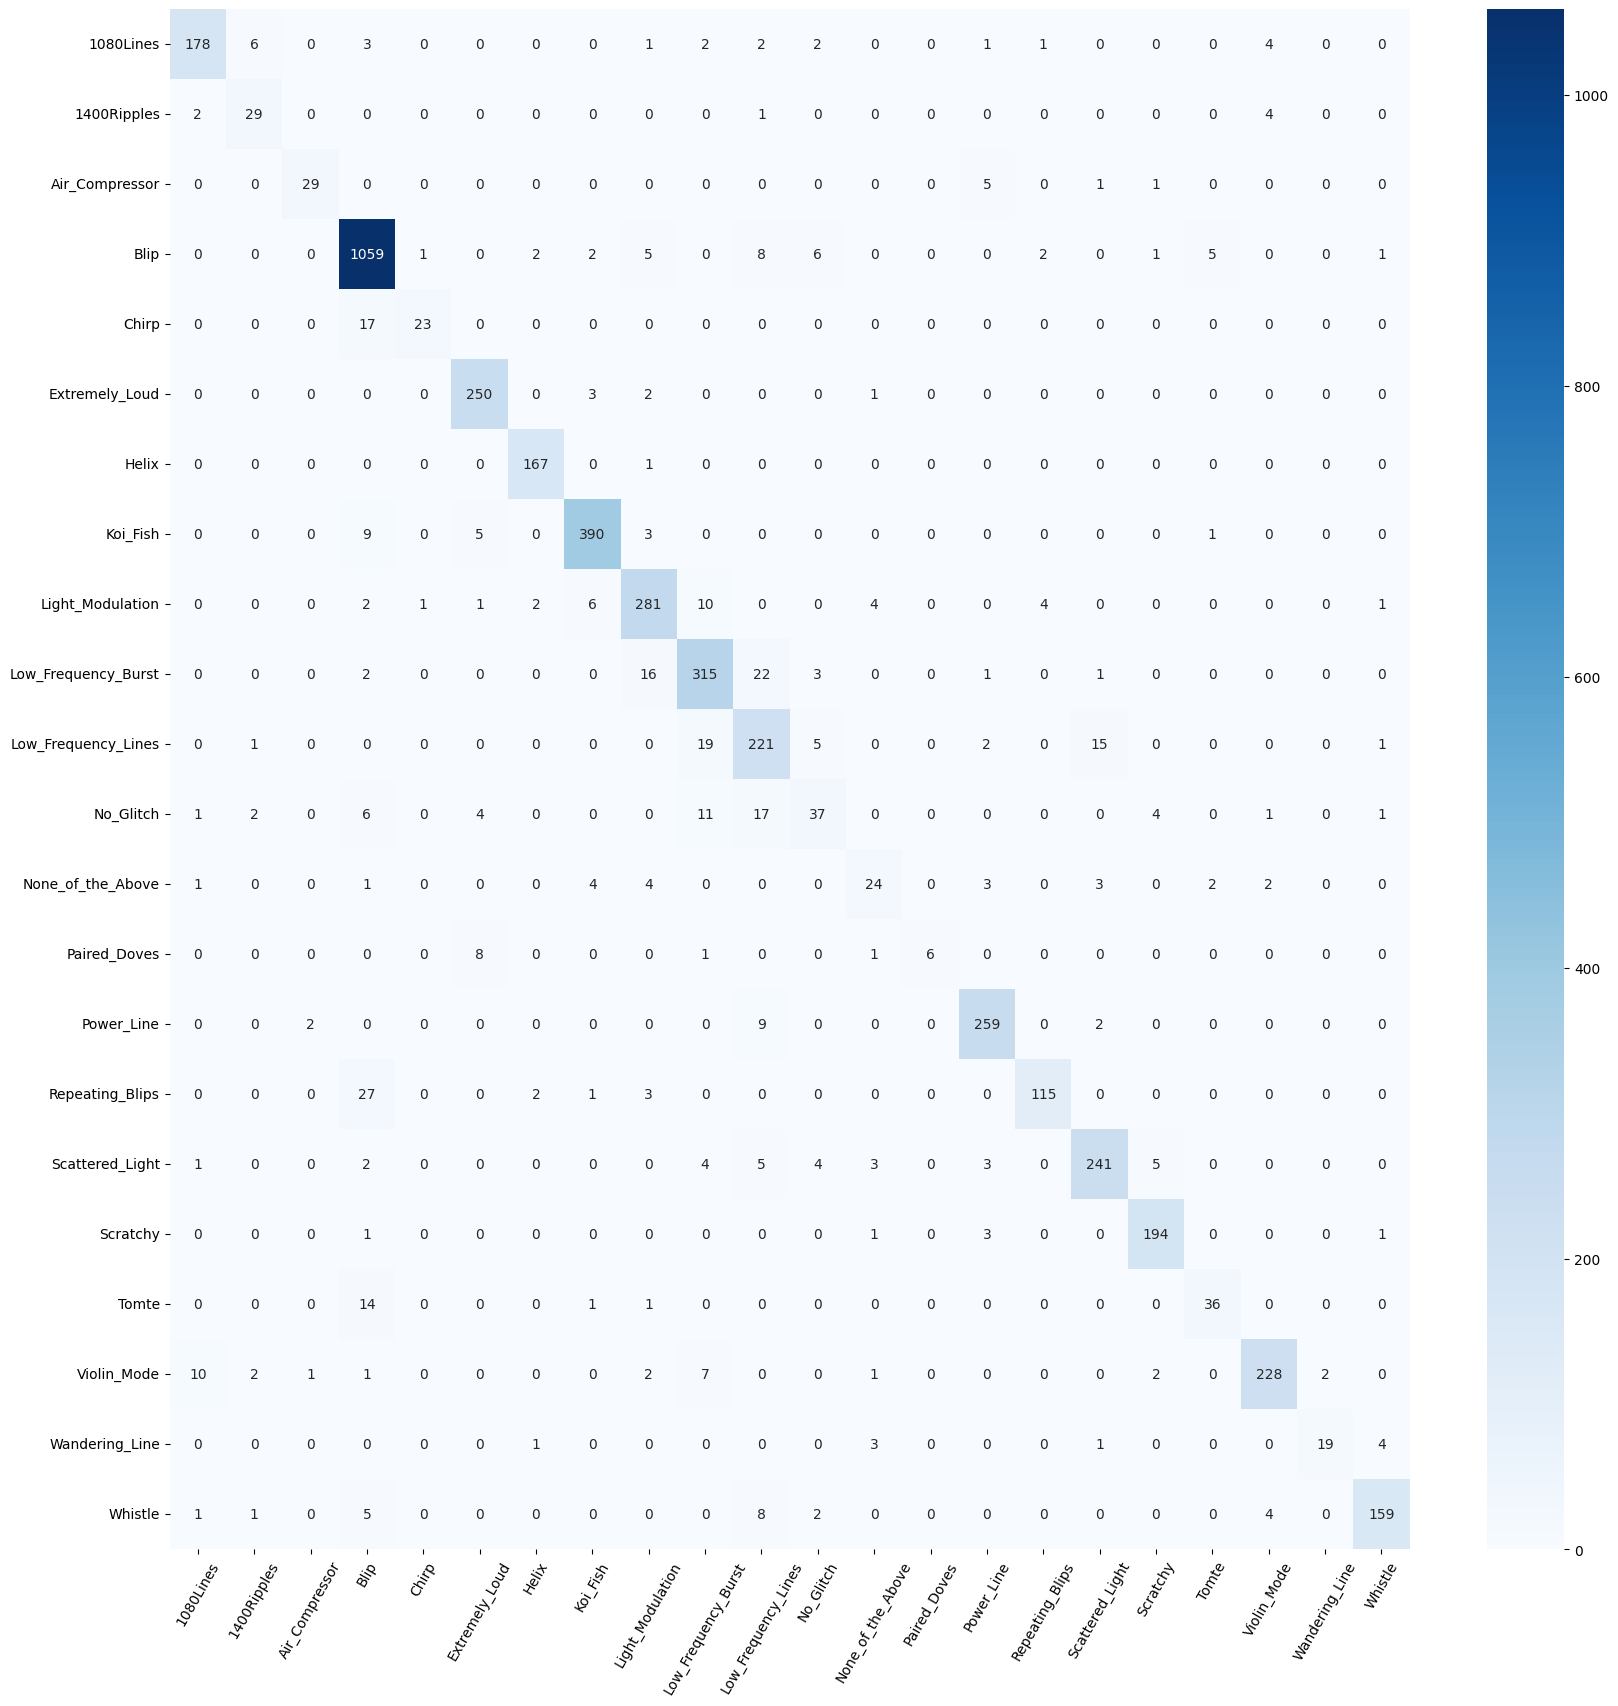

In [34]:
# Create the confusion matrix
from tensorflow.math import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(true_class, pred_class)

plt.figure(figsize=(20, 20))

x_labels = class_names
y_labels = class_names
sns.heatmap(conf_mat,
           cmap="Blues",
           fmt="",
           annot=True,
           xticklabels=x_labels,
            yticklabels=y_labels
           )
plt.xticks(rotation=60);

In [35]:
# Get the classification report
from sklearn.metrics import classification_report

class_report = classification_report(true_class, pred_class)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       200
           1       0.71      0.81      0.75        36
           2       0.91      0.81      0.85        36
           3       0.92      0.97      0.95      1092
           4       0.92      0.57      0.71        40
           5       0.93      0.98      0.95       256
           6       0.96      0.99      0.98       168
           7       0.96      0.96      0.96       408
           8       0.88      0.90      0.89       312
           9       0.85      0.88      0.86       360
          10       0.75      0.84      0.79       264
          11       0.63      0.44      0.52        84
          12       0.63      0.55      0.59        44
          13       1.00      0.38      0.55        16
          14       0.94      0.95      0.94       272
          15       0.94      0.78      0.85       148
          16       0.91      0.90      0.91       268
          17       0.94    

In [37]:
import pandas as pd
# Get the class-wise f1 score
class_report_dict = classification_report(true_class, pred_class, output_dict=True)

# Create a pandas DataFrame with class names and f1 scores
class_f1_dict = {}
for k, v in class_report_dict.items():
    if k == "accuracy":
        break
    class_f1_dict[class_names[int(k)]] = v['f1-score']
df_f1_score = pd.DataFrame({"class_name": list(class_f1_dict.keys()),
                           "f1_score": list(class_f1_dict.values())}).sort_values("f1_score", ascending=False)
df_f1_score

,class_name,f1_score
6,Helix,0.976608
7,Koi_Fish,0.957055
5,Extremely_Loud,0.954198
17,Scratchy,0.953317
3,Blip,0.945114
14,Power_Line,0.943534
19,Violin_Mode,0.913828
21,Whistle,0.913793
16,Scattered_Light,0.906015
0,1080Lines,0.903553


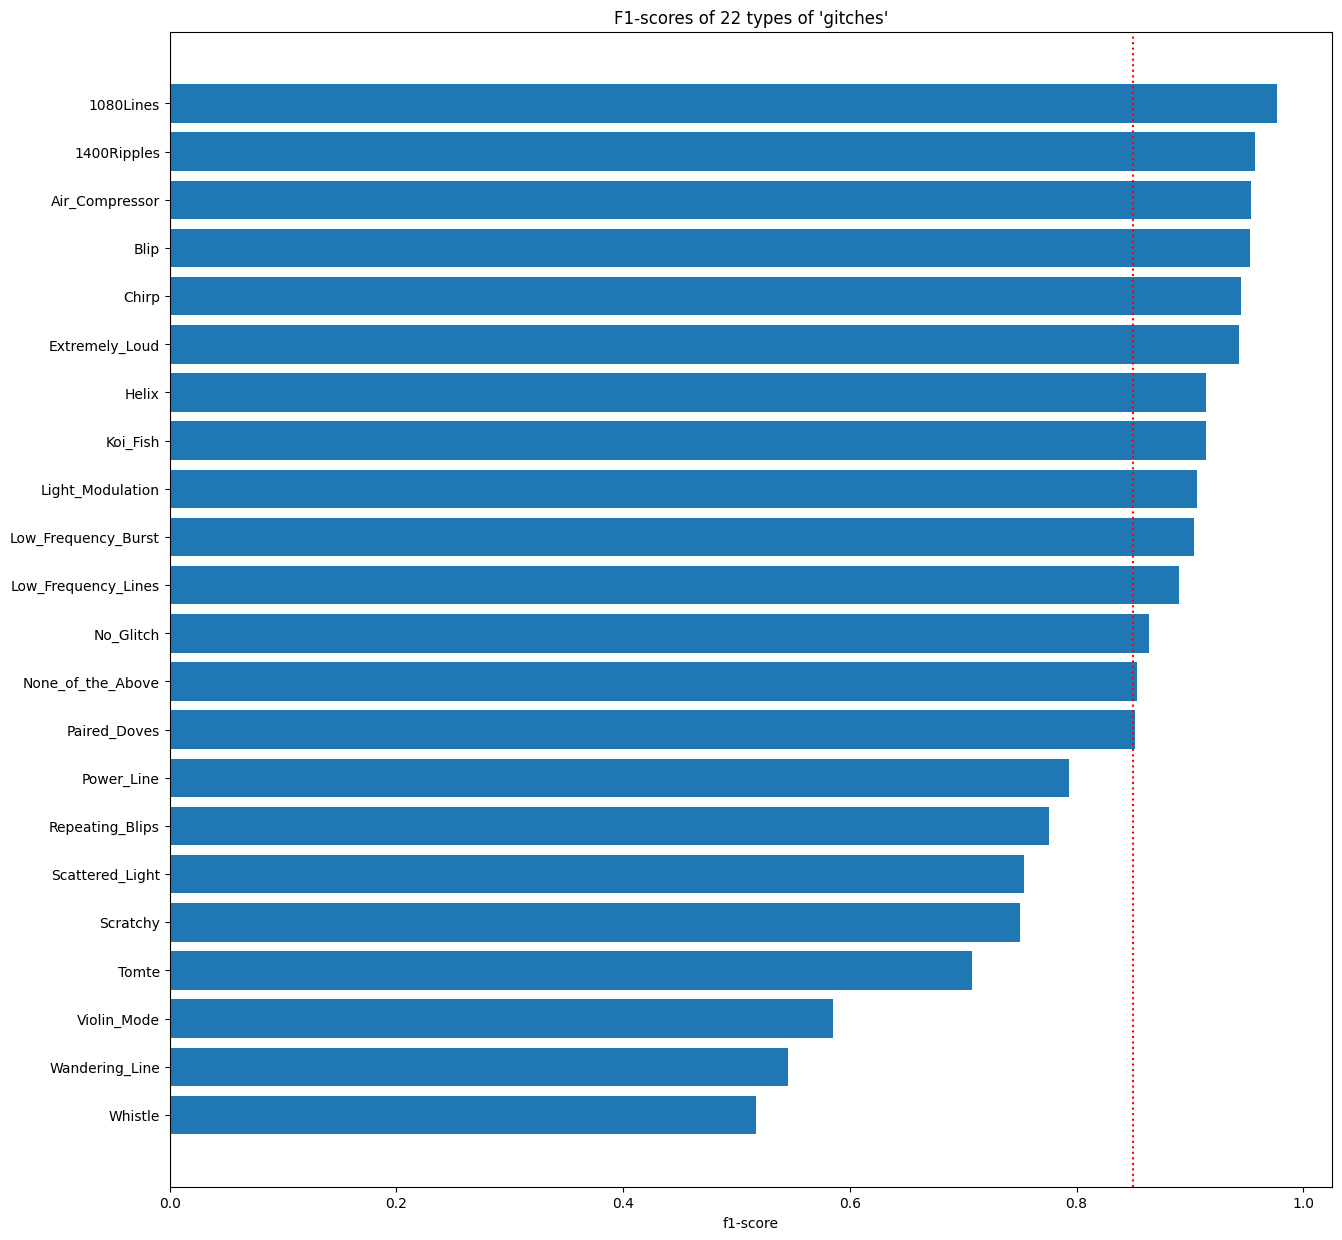

In [38]:
# Plot the horizontal bar chart
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
scores = ax.barh(range(len(df_f1_score)), df_f1_score["f1_score"])
ax.set_yticks(range(len(df_f1_score)))
ax.set_yticklabels(class_names)
ax.set_xlabel("f1-score")
ax.set_title("F1-scores of 22 types of 'gitches'")
plt.axvline(x=0.85, ls='dotted', c='r')
ax.invert_yaxis();

In [39]:
# Prepare images to load into the model

def prep_testimgs(filename,
                 img_shape=224,
                 scale=True):
    img = tf.io.read_file(filename)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    img = img[:, :, :3] # Converting the image size from (224, 224, 4) due to alpha channel to (224, 224, 3).
    # From here: (https://stackoverflow.com/questions/35902302/discarding-alpha-channel-from-images-stored-as-numpy-arrays)
    if scale:
        return img/255.
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


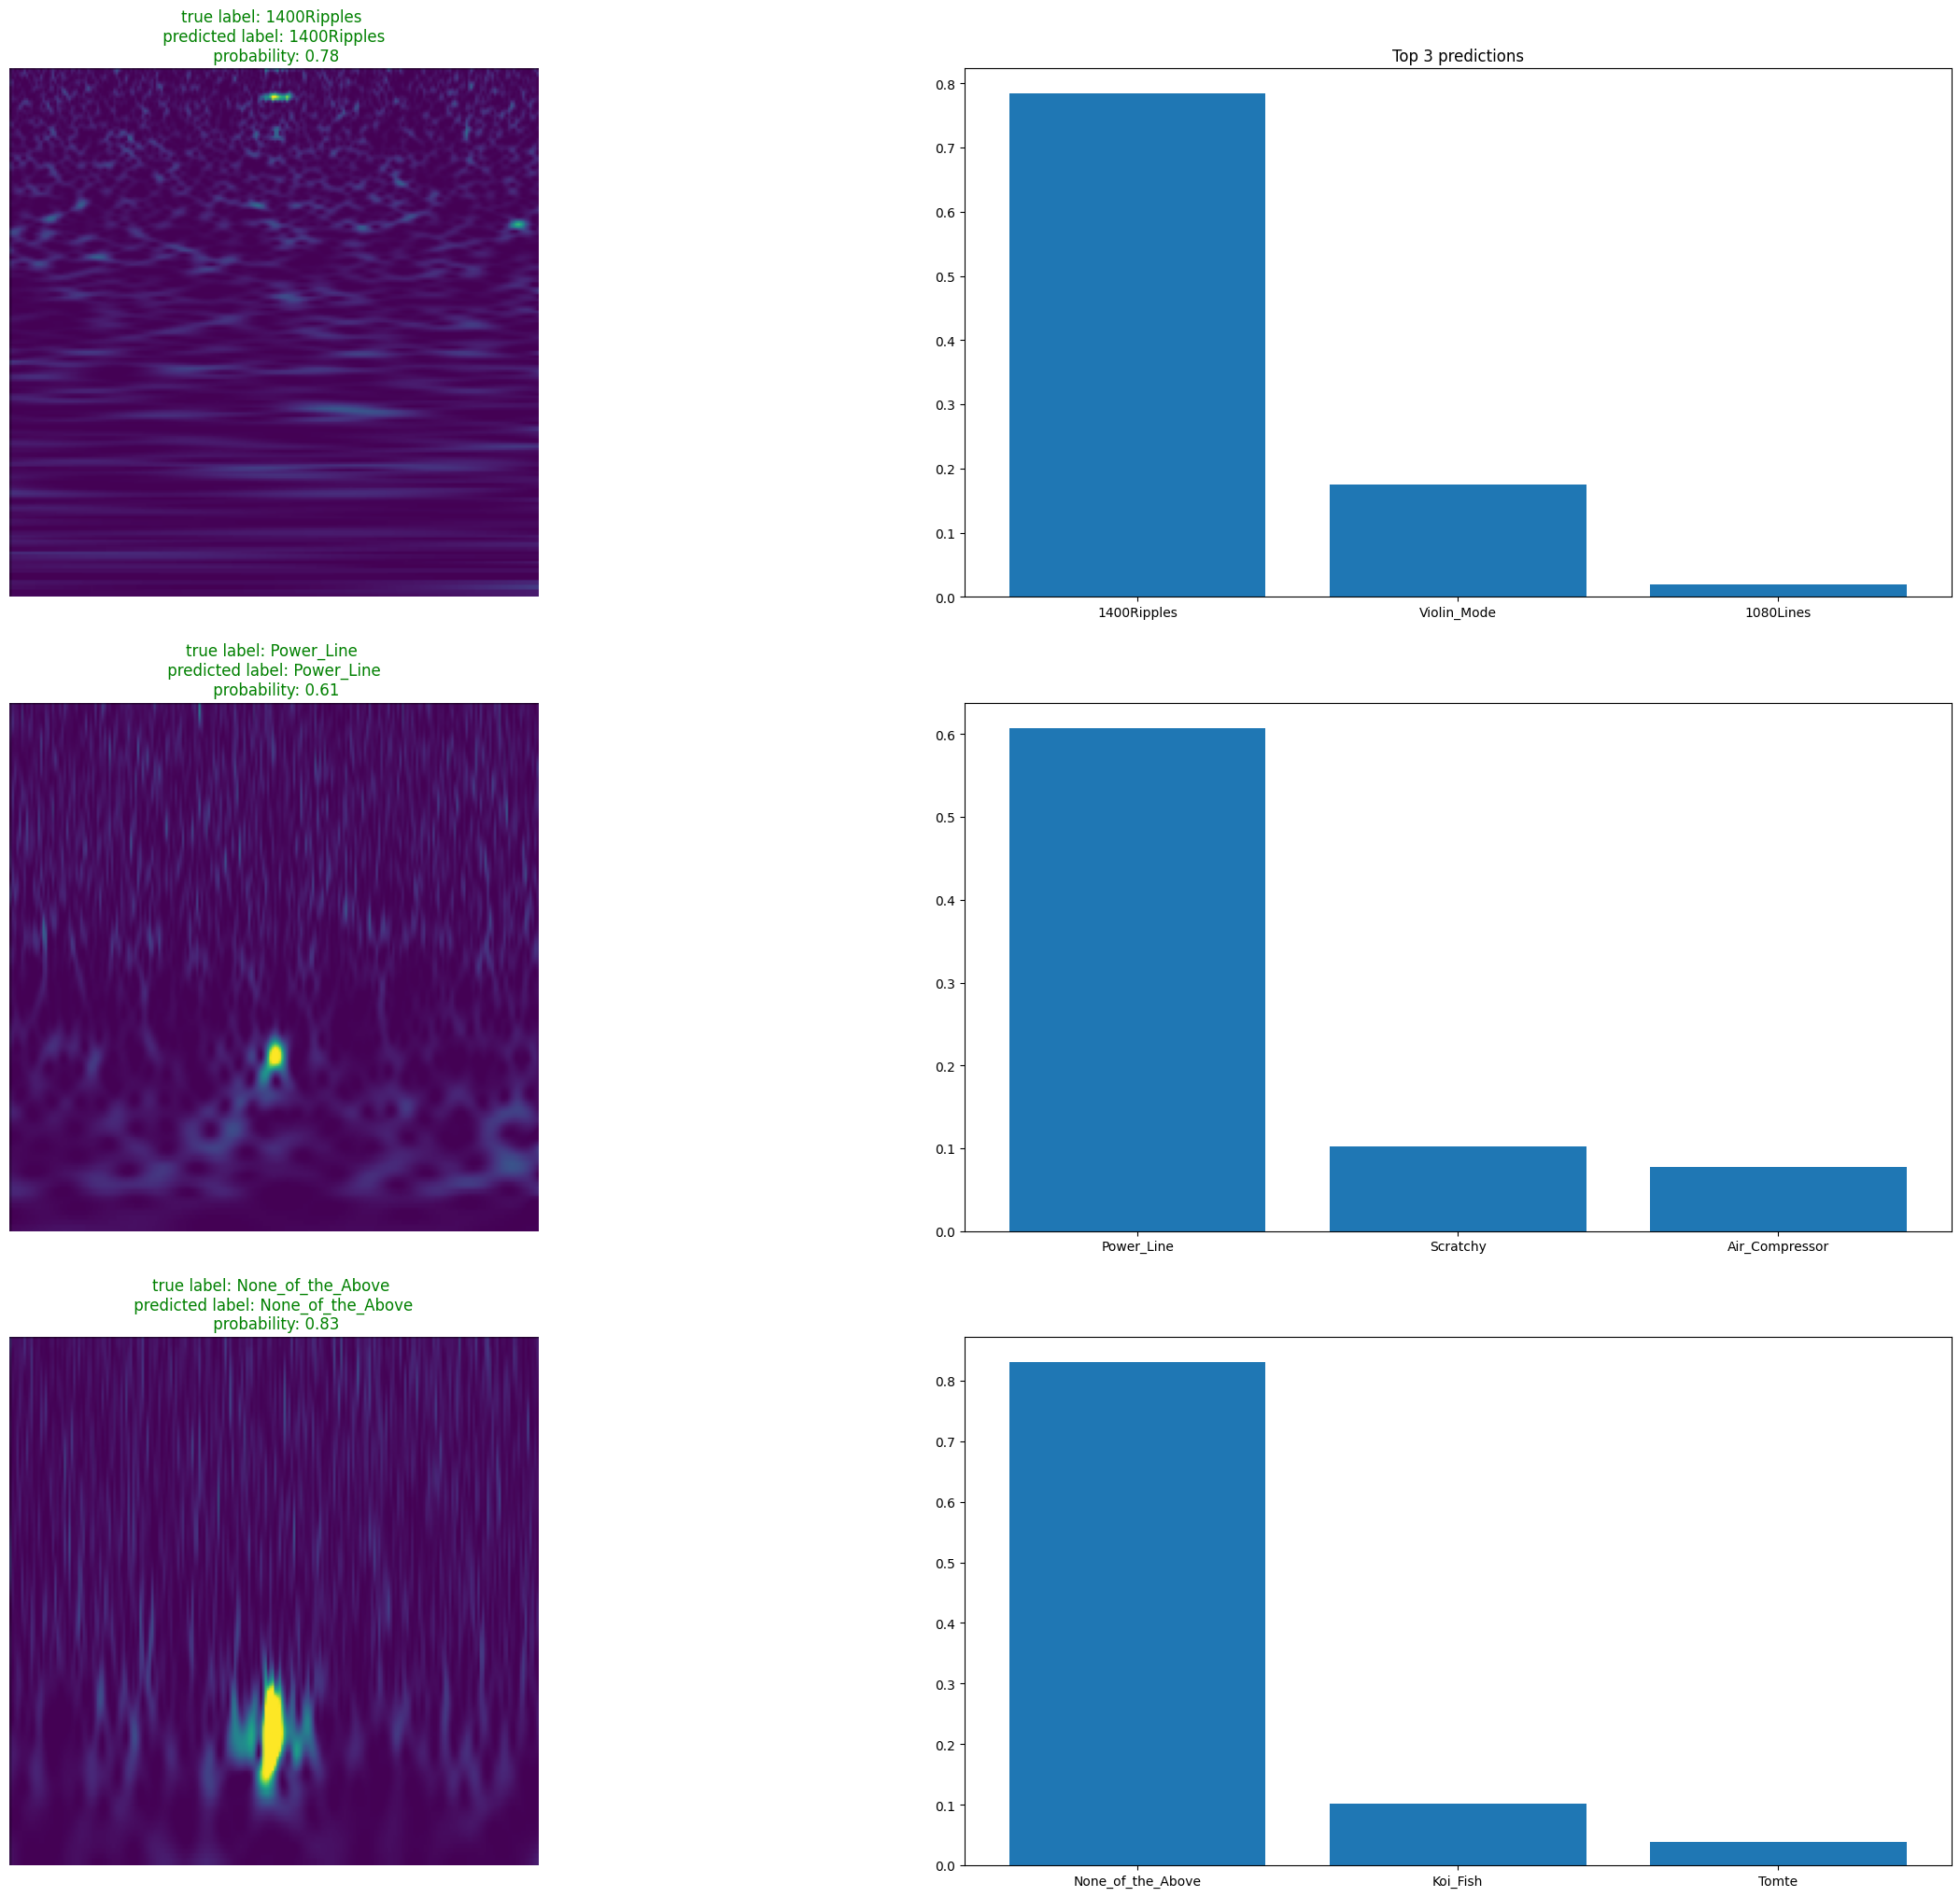

In [46]:
# Select 1 random image from different class and make prediction

import os
import random

num_plots = 3
fig, axs = plt.subplots(num_plots, 2, figsize=(30, 25))
for i in range(num_plots):

    # Get the random image file path
    random_class_name = random.choice(class_names)
    random_file = random.choice(os.listdir(test_dir + "/" + random_class_name))
    filepath = test_dir + random_class_name + "/" + random_file

    # Image preprocessing before it is fed inside model for prediction
    # Remember the model already has image rescaling layer built in so we don't need to rescale it
    img = tf.io.read_file(filepath)
    img = tf.io.decode_image(img)
    img = tf.image.resize(img, [224, 224])
    img = img[:, :, :3]
    img = tf.expand_dims(img, axis=0)

    # Predict the image using the model we built
    pred_prob_image = model.predict(img)
    pred_class_image = class_names[pred_prob_image.argmax()]

    top_3_pred_prob_idx = (pred_prob_image.argsort())[0][-3:][::-1]
    top_3_pred_prob = [pred_prob_image[0][idx1] for idx1 in top_3_pred_prob_idx]
    top_3_pred_class = [class_names[idx2] for idx2 in top_3_pred_prob_idx]

    # Plot the figure
    # We need to remove that extra dimension related to the batch and divide the pixels by 255. for imshow() function
    axs[i, 0].imshow(tf.squeeze(img/255.))
    if random_class_name == pred_class_image:
        title_color = 'g'
    else:
        title_color = 'r'
    axs[i, 0].set_title(f"true label: {random_class_name} \n predicted label: {pred_class_image} \n probability: {pred_prob_image.max():.2f}",
                     c=title_color)
    axs[i, 0].axis(False)

    axs[0, 1].set_title("Top 3 predictions")
    axs[i, 1].bar(top_3_pred_class, top_3_pred_prob);